# Portfolio Risk Analysis

Project for course BA870

Team members: Hemangi Suthar, Mahika Jain, Yashna Meher

## Motivation and Problem Statement

In today's world, more and more people are investing in the stock market, but many of them don't fully understand the risk involved in their portfolios. Most investors either follow trends blindly or depend on basic advice, without checking how balanced or risky their investments really are. Even experienced investors may not have the tools to measure how much their portfolio depends on the market, or whether it's well-diversified across different types of stocks.

Our motivation for this project came from this common gap. We wanted to create a tool that not only shows how much return a portfolio is making, but also explains how much risk it carries — and more importantly, where that risk is coming from. Is the portfolio too volatile? Is it following the market too closely? Are all the stocks behaving the same way?

We also wanted to explore how machine learning can be used to provide smarter insights — not just numbers, but suggestions that actually help investors build a more balanced portfolio.

So, the main problem we are trying to solve is:
How can we help investors measure, understand, and improve the risk and balance in their stock portfolios using a mix of financial and machine learning models?

Through this project, we aim to make risk more visible, diversification more measurable, and decision-making more data-driven — all in a way that is simple, practical, and useful for everyday investors.

## Data Description

For this project, we used historical stock price data of companies listed in the S&P 500 index. This index includes 500 of the largest and most well-known companies in the U.S. market.

We downloaded the daily adjusted closing prices of these stocks for the last 10 years using the Yahoo Finance API. This gave us enough data to calculate important financial metrics like returns, volatility, and risk.

We also used data from Wikipedia to get the latest list of S&P 500 companies and their tickers. In some parts of the project, we filtered this data to focus only on the stocks that are part of the user's portfolio.

All data used is publicly available and updated, which makes the tool more realistic and practical for real-world use.

## Data Download and Return Calculation

We first define a function fetch_prices() that uses yfinance to download historical price data for S&P 500 companies. The tickers are either user-defined or fetched in batch. We extract only the adjusted close prices - which reflect true returns after splits and dividends - and compute daily percentage returns using .pct_change(). This prepares the dataset for portfolio construction and risk analysis.




In [1]:
import yfinance as yf
import pandas as pd

def fetch_prices(tickers, start="2015-01-01", end="2024-12-31"):
    """
    Fetches adjusted close prices for given tickers using Yahoo Finance.
    Returns a DataFrame with tickers as columns and dates as index.
    """
    data = yf.download(tickers, start=start, end=end, auto_adjust=False)

    if len(tickers) > 1:
        adj_close = pd.DataFrame({ticker: data[ticker]["Adj Close"] for ticker in tickers})
    else:
        adj_close = data["Adj Close"].to_frame(tickers[0])

    adj_close.dropna(inplace=True)
    return adj_close


**Load S&P 500 Tickers and Fetch Full Dataset**


In [2]:
import pandas as pd
import yfinance as yf

# You can download a list of S&P 500 tickers from Wikipedia (or any other list of tickers)
import requests

def get_sp500_tickers():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    tables = pd.read_html(url)
    tickers = tables[0]['Symbol'].tolist()
    return tickers

def fetch_all_data(tickers, start, end):
    # Download all data for the tickers
    data = yf.download(tickers, start=start, end=end, group_by='ticker', auto_adjust=False)

    # If single ticker, expand the structure to match the multi-ticker format
    if len(tickers) == 1:
        ticker = tickers[0]
        data.columns = pd.MultiIndex.from_product([[ticker], data.columns])

    return data

# Fetch the list of S&P 500 tickers
tickers = get_sp500_tickers()

# Specify the date range
start_date = "2015-01-01"
end_date = "2024-12-31"

# Fetch data for all tickers
sp500_prices_all = fetch_all_data(tickers, start_date, end_date)

# Example: Display first 20 rows of the data
print(sp500_prices_all.head())

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2015-01-01 -> 2024-12-31)')


Ticker            VLO                                                       \
Price            Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2015-01-02  49.549999  50.459999  49.070000  50.340000  33.586449  5897000   
2015-01-05  49.840000  49.840000  48.090000  48.270000  32.205364  7732700   
2015-01-06  48.220001  48.950001  47.290001  47.680000  31.811720  8586800   
2015-01-07  48.070000  48.950001  47.160000  47.310001  31.564854  8825800   
2015-01-08  48.090000  50.119999  47.759998  50.020000  33.372932  8941700   

Ticker            TPR                                   ...       WDAY  \
Price            Open       High        Low      Close  ...        Low   
Date                                                    ...              
2015-01-02  37.700001  37.919998  37.009998  37.310001  ...  79.250000   
2015-01-05  37.630001  37.630001  36.520000  36.730000  ...  79.110001   
2015-

**Extract close price**


In [3]:
# Extract only the Adjusted Close prices
sp500_adj_close = pd.DataFrame({ticker: sp500_prices_all[ticker]['Adj Close'] for ticker in tickers if ticker in sp500_prices_all.columns.levels[0]})

# Drop tickers with all NaNs
sp500_adj_close.dropna(axis=1, how='all', inplace=True)

# Preview
print(f"✅ Adjusted Close shape: {sp500_adj_close.shape}")
sp500_adj_close.head()


✅ Adjusted Close shape: (2515, 501)


,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,97.442429,23.835094,36.744816,42.761036,74.623970,72.339996,2.67,9.532939,23.935610,37.273819,...,24.881342,100.578720,80.410004,126.880714,26.153713,33.441818,42.833290,77.430000,100.714745,40.022465
2015-01-05,95.244827,23.418055,36.752995,41.956299,73.364029,71.980003,2.66,9.261562,23.308605,36.575397,...,23.896437,99.856232,80.010002,124.721268,25.856853,31.360474,41.963013,76.339996,104.471764,39.782204
2015-01-06,94.229179,23.226551,36.335629,41.748627,72.834801,70.529999,2.63,9.052813,23.100914,36.005623,...,23.571796,99.359528,79.419998,122.060822,25.994427,31.176056,41.447964,75.790001,103.586174,39.394089
2015-01-07,94.912231,23.396769,36.630249,43.435978,74.363564,71.110001,2.58,9.066728,23.245911,36.483505,...,23.445251,100.781876,79.349998,125.645546,26.218891,31.421953,42.821453,77.720001,106.162422,40.207287
2015-01-08,97.186989,24.005312,37.383148,43.890247,75.497574,72.919998,2.61,9.205894,23.473196,37.577087,...,23.670839,101.933273,82.779999,127.157158,26.523001,31.659063,43.567417,79.379997,107.289536,40.826435


**Calculate daily returns**

We then compute **daily percentage returns** for each stock. This dataset forms the foundation for all upcoming analyses, such as portfolio risk assessment, return comparisons, and machine learning models.


In [4]:
# Calculate daily percentage returns
sp500_returns = sp500_prices_all.pct_change().dropna()

# Preview result
print(f"✅ Returns shape: {sp500_returns.shape}")
sp500_returns.head()


<ipython-input-4-709274e819a7>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sp500_returns = sp500_prices_all.pct_change().dropna()


✅ Returns shape: (0, 3018)


Empty DataFrame
Columns: [(VLO, Open), (VLO, High), (VLO, Low), (VLO, Close), (VLO, Adj Close), (VLO, Volume), (TPR, Open), (TPR, High), (TPR, Low), (TPR, Close), (TPR, Adj Close), (TPR, Volume), (CARR, Open), (CARR, High), (CARR, Low), (CARR, Close), (CARR, Adj Close), (CARR, Volume), (HSIC, Open), (HSIC, High), (HSIC, Low), (HSIC, Close), (HSIC, Adj Close), (HSIC, Volume), (CI, Open), (CI, High), (CI, Low), (CI, Close), (CI, Adj Close), (CI, Volume), (APA, Open), (APA, High), (APA, Low), (APA, Close), (APA, Adj Close), (APA, Volume), (EXPE, Open), (EXPE, High), (EXPE, Low), (EXPE, Close), (EXPE, Adj Close), (EXPE, Volume), (CDNS, Open), (CDNS, High), (CDNS, Low), (CDNS, Close), (CDNS, Adj Close), (CDNS, Volume), (DTE, Open), (DTE, High), (DTE, Low), (DTE, Close), (DTE, Adj Close), (DTE, Volume), (CRWD, Open), (CRWD, High), (CRWD, Low), (CRWD, Close), (CRWD, Adj Close), (CRWD, Volume), (TECH, Open), (TECH, High), (TECH, Low), (TECH, Close), (TECH, Adj Close), (TECH, Volume), (UNH, Open), (UNH, High), (UNH, Low), (UNH, Close), (UNH, Adj Close), (UNH, Volume), (EXPD, Open), (EXPD, High), (EXPD, Low), (EXPD, Close), (EXPD, Adj Close), (EXPD, Volume), (KMI, Open), (KMI, High), (KMI, Low), (KMI, Close), (KMI, Adj Close), (KMI, Volume), (VICI, Open), (VICI, High), (VICI, Low), (VICI, Close), (VICI, Adj Close), (VICI, Volume), (SCHW, Open), (SCHW, High), (SCHW, Low), (SCHW, Close), (SCHW, Adj Close), (SCHW, Volume), (HPE, Open), (HPE, High), (HPE, Low), (HPE, Close), ...]
Index: []

[0 rows x 3018 columns]

**Output**: `returns` DataFrame with daily percent returns for each stock.

In [5]:
import numpy as np
# # Recalculate returns as before
# returns = adj_close.pct_change()



# For each day, only use available tickers (not NaN)
def equal_weight_portfolio(returns_df):
    port_ret = []
    for idx, row in returns_df.iterrows():
        vals = row.dropna()
        if len(vals) > 0:
            weight = 1 / len(vals)
            port_ret.append((vals * weight).sum())
        else:
            port_ret.append(np.nan)
    return pd.Series(port_ret, index=returns_df.index, name="Portfolio_Return")

weighted_returns = equal_weight_portfolio(sp500_returns)
weighted_returns = weighted_returns.dropna()

print(f"📈 Rolling equal-weight portfolio shape: {weighted_returns.shape}")
weighted_returns.head()


📈 Rolling equal-weight portfolio shape: (0,)


,Portfolio_Return
Date,


In [ ]:
tickers = ["TSLA", "MSFT", "GOOG","TMUS", "AIG", "CRM", "META","CVS","KO","IBM"]

prices = fetch_prices(tickers, start_date, end_date)
print(prices.head())

print(sp500_returns[tickers])



[*********************100%***********************]  10 of 10 completed


,TSLA,MSFT,GOOG,TMUS,AIG,CRM,META,CVS,KO,IBM
Date,,,,,,,,,,
2015-01-02,14.620667,40.072132,26.045292,26.696949,43.798355,58.818542,78.081993,70.937996,30.437494,99.992149
2015-01-05,14.006000,39.703632,25.502361,26.335123,42.931900,57.756149,76.827911,70.236816,30.437494,98.418793
2015-01-06,14.085333,39.120884,24.911289,26.276451,42.323051,56.793045,75.792793,70.289024,30.668631,96.296272
2015-01-07,14.063333,39.617954,24.868612,27.625967,42.526009,56.524979,75.792793,71.557091,31.051460,95.666939
2015-01-08,14.041333,40.783428,24.947023,28.378958,42.338669,58.173161,77.813271,73.078804,31.427042,97.746239


This gives us a DataFrame where each row shows the market return and the portfolio return for the same day — useful for regression analysis.

## Portfolio-Market Alignment and Risk Metrics

### Downloading and aligning market returns from S&P500

We download S&P 500 index (^GSPC) prices and calculate its daily returns. Then we align these with our portfolio returns so both are on the same timeline.


In [ ]:
# Download S&P 500 index (^GSPC)
sp500_gspc = yf.download("^GSPC", start="2015-01-01", end="2024-12-31", auto_adjust=True)["Close"]
sp500_returns_gspc = sp500_gspc.pct_change().dropna()
sp500_returns_gspc.name = "Market_Return"

# Align portfolio and market returns
aligned = pd.concat([weighted_returns, sp500_returns_gspc], axis=1).dropna()

# Preview
print(f"✅ Aligned shape: {aligned.shape}")
aligned.head()


[*********************100%***********************]  1 of 1 completed

✅ Aligned shape: (2514, 2)


,Portfolio_Return,^GSPC
Date,,
2015-01-05,-0.016506,-0.018278
2015-01-06,-0.009565,-0.008893
2015-01-07,0.012616,0.011630
2015-01-08,0.018444,0.017888
2015-01-09,-0.007610,-0.008404


This gives us a DataFrame where each row shows the market return and the portfolio return for the same day — useful for regression analysis.

We clean up column names and preview the aligned returns again to ensure consistency.

In [ ]:
# Download S&P 500 index (^GSPC)
# sp500 = yf.download("^GSPC", start="2015-01-01", end="2024-12-31", auto_adjust=True)["Close"]
# sp500.name = "S&P500"

# Calculate S&P500 daily returns and rename column
# sp500_returns = sp500.pct_change().dropna()
# sp500_returns.name = "Market_Return"

# Align with portfolio
aligned = pd.concat([weighted_returns, sp500_returns], axis=1).dropna()
aligned.columns = ["Portfolio_Return", "Market_Return"]  # enforce naming

# Confirm it's good
print(aligned.head())


[*********************100%***********************]  1 of 1 completed

            Portfolio_Return  Market_Return
Date                                       
2015-01-05         -0.016506      -0.018278
2015-01-06         -0.009565      -0.008893
2015-01-07          0.012616       0.011630
2015-01-08          0.018444       0.017888
2015-01-09         -0.007610      -0.008404


The aligned DataFrame now has clear column names: Portfolio_Return and Market_Return.


### Regression beta CAPM model

We run a linear regression using statsmodels to calculate the portfolio’s beta — how sensitive it is to market movement.

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(aligned["Market_Return"])
y = aligned["Portfolio_Return"]

model = sm.OLS(y, X).fit()
beta = model.params["Market_Return"]

print(f"📌 Portfolio Beta: {beta:.4f}")


📌 Portfolio Beta: 0.9912


We obtain the beta coefficient, which quantifies how much the portfolio reacts to market changes

Beta tells you how sensitive a stock (or portfolio) is to movements in the overall market.

| **Beta Value** | **Interpretation**                            | **Relative Risk**      |
|----------------|-----------------------------------------------|-------------------------|
| **= 1.0**      | Moves in line with the market                 | Average market risk     |
| **> 1.0**      | More volatile than the market                 | Higher than market risk |
| **< 1.0**      | Less volatile than the market                 | Lower than market risk  |
| **= 0**        | No correlation with market movements          | Market-neutral          |
| **< 0**        | Moves opposite to the market (inverse pattern) | Hedging behavior        |


### Calculating Sharpe Ratio

We download the 3-month Treasury bill rate (^IRX) and compute the Sharpe Ratio using portfolio returns and the risk-free rate.

In [ ]:
# Load risk-free rate from Yahoo Finance
risk_free = yf.download("^IRX", start="2015-01-01", end="2024-12-31")["Close"] / 100
risk_free.name = "Risk_Free_Rate"

# Align dates
rf_aligned = pd.concat([weighted_returns, risk_free], axis=1).dropna()
rf_aligned.columns = ["Portfolio_Return", "Risk_Free_Rate"]

# Convert annualized % to daily decimal return
rf_aligned["Risk_Free_Rate"] = (1 + rf_aligned["Risk_Free_Rate"]) ** (1/252) - 1

# Excess return
excess_return = rf_aligned["Portfolio_Return"] - rf_aligned["Risk_Free_Rate"]

# Sharpe Ratio (annualized)
sharpe_ratio = (excess_return.mean() / excess_return.std()) * (252 ** 0.5)
print(f"📌 Annualized Sharpe Ratio: {sharpe_ratio:.4f}")


[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True
📌 Annualized Sharpe Ratio: 0.7914


This block calculates the Sharpe Ratio, a key metric that tells us how much return we are getting per unit of risk.

### Calculate Annual Volatility

In [ ]:
# Annualized volatility (standard deviation of daily returns × sqrt(252))
port_volatility = weighted_returns.std() * (252 ** 0.5)

# Interpret risk level
if port_volatility < 0.10:
    risk_level = "🟢 Low Risk – Stable portfolio with limited fluctuations."
elif port_volatility < 0.20:
    risk_level = "🟡 Moderate Risk – Balanced risk and return profile."
else:
    risk_level = "🔴 High Risk – Expect significant value swings."

print(f"📈 Annualized Volatility: {port_volatility:.2%}")
print(f"📌 Risk Interpretation: {risk_level}")


📈 Annualized Volatility: 18.44%
📌 Risk Interpretation: 🟡 Moderate Risk – Balanced risk and return profile.


## Portfolio Risk Forecasting (VaR + GARCH)

### Value at Risk (VaR) – 95% Confidence

We use a statistical z-score to estimate how much we might lose in a single day at a 95% confidence level, based on historical portfolio volatility.

In [ ]:
from scipy.stats import norm

confidence_level = 0.95
z_score = norm.ppf(1 - confidence_level)  # ≈ -1.645

# Calculate daily VaR as a % (normal assumption)
VaR_95 = -z_score * weighted_returns.std()

# Convert to dollar loss on a $10,000 portfolio
portfolio_value = 10000
VaR_dollar = VaR_95 * portfolio_value

# Risk message
if VaR_95 < 0.01:
    risk_comment = "🟢 Low loss potential – relatively stable portfolio."
elif VaR_95 < 0.03:
    risk_comment = "🟡 Moderate loss potential – monitor during volatility."
else:
    risk_comment = "🔴 High loss risk – portfolio may see significant drops."

# Output
print(f"⚠️  Value at Risk (95% confidence): {VaR_95:.2%}")
print(f"💵 Estimated Max Daily Loss: ${VaR_dollar:,.2f}")
print(f"📌 Interpretation: {risk_comment}")


⚠️  Value at Risk (95% confidence): 1.91%
💵 Estimated Max Daily Loss: $191.11
📌 Interpretation: 🟡 Moderate loss potential – monitor during volatility.


In [ ]:
yf.download("AAPL", period="1d", interval="1m")


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2025-04-25 13:30:00+00:00,207.675003,207.830002,206.199997,206.429993,1671315
2025-04-25 13:31:00+00:00,207.455002,207.750000,206.899994,207.699997,188114
2025-04-25 13:32:00+00:00,206.779999,207.455002,206.770096,207.455002,154238
2025-04-25 13:33:00+00:00,207.427399,207.427399,206.809998,206.809998,111923
2025-04-25 13:34:00+00:00,207.570007,207.629898,207.289993,207.414993,101045
...,...,...,...,...,...
2025-04-25 17:48:00+00:00,208.054993,208.279999,208.000000,208.220001,54993
2025-04-25 17:49:00+00:00,208.149994,208.169998,207.770004,208.039993,69687


### GARCH(1,1) – Volatility Forecast for Next 30 Days

In [ ]:
!pip install arch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 20.1 MB/s eta 0:00:00


**Fitting GARCH model and forecasting volatility**

We use a GARCH model to forecast how portfolio volatility may behave over the next 30 days. This helps predict risk in the short term.

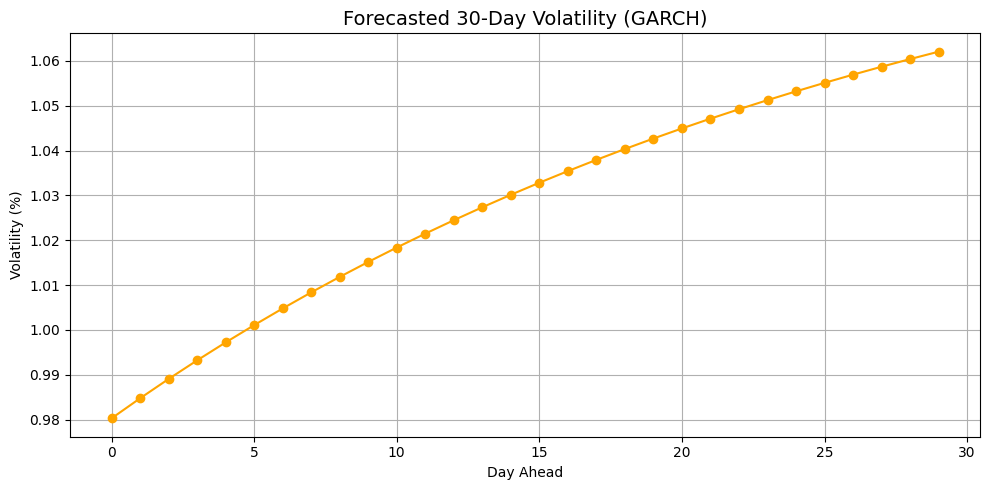

In [ ]:
from arch import arch_model
import matplotlib.pyplot as plt

# Clean input for GARCH: convert returns to percent and drop missing
garch_returns = weighted_returns * 100
garch_returns = garch_returns.dropna()

# Fit GARCH(1,1)
garch_model = arch_model(garch_returns, vol='Garch', p=1, q=1, rescale=False)
garch_fit = garch_model.fit(disp="off")

# Forecast next 30 days of volatility
garch_forecast = garch_fit.forecast(horizon=30)
volatility_forecast = np.sqrt(garch_forecast.variance.values[-1, :])

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(volatility_forecast, marker='o', linestyle='-', color='orange')
plt.title("Forecasted 30-Day Volatility (GARCH)", fontsize=14)
plt.xlabel("Day Ahead")
plt.ylabel("Volatility (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


The plot shows predicted volatility for each of the next 30 days. This gives insight into how stable or risky the portfolio might be in the near future.

## Real time price fetch function for 3 stocks


In [ ]:
def get_live_price(ticker):
    stock = yf.Ticker(ticker)
    todays_data = stock.history(period='1d', interval='1m')

    if not todays_data.empty:
        latest_price = todays_data['Close'].iloc[-1]
        print(f"📈 {ticker}: ${latest_price:.2f}")
        return latest_price
    else:
        print(f"❌ No real-time data for {ticker}")
        return None

# Example: Fetch prices for multiple tickers
portfolio_tickers = ["AAPL", "MSFT", "GOOGL","TSLA","IBM","TMUS", "AIG", "CRM", "META","CVS","KO"]  # or use returns.columns.tolist() for all 346
live_prices = {}

for ticker in portfolio_tickers:
    price = get_live_price(ticker)
    if price is not None:
        live_prices[ticker] = price

print("\n✅ Live prices fetched:")
print(live_prices)


📈 AAPL: $208.66
📈 MSFT: $389.93
📈 GOOGL: $161.78
📈 TSLA: $283.75
📈 IBM: $231.11
📈 TMUS: $232.96
📈 AIG: $81.10
📈 CRM: $267.29
📈 META: $545.91
📈 CVS: $65.30
📈 KO: $71.79

✅ Live prices fetched:
{'AAPL': np.float64(208.6649932861328), 'MSFT': np.float64(389.93499755859375), 'GOOGL': np.float64(161.77999877929688), 'TSLA': np.float64(283.7539978027344), 'IBM': np.float64(231.11000061035156), 'TMUS': np.float64(232.9600067138672), 'AIG': np.float64(81.0999984741211), 'CRM': np.float64(267.2900085449219), 'META': np.float64(545.9099731445312), 'CVS': np.float64(65.30000305175781), 'KO': np.float64(71.78579711914062)}


**Calculate today's portfolio return**

In [ ]:
# Ensure you're only using adjusted close values
adj_close_only = prices_all.xs('Adj Close', axis=1, level=1)

# Now extract just the portfolio tickers
initial = adj_close_only[portfolio_tickers].iloc[-2]
latest = adj_close_only[portfolio_tickers].iloc[-1]
# Equal weights
weights = [1 / len(portfolio_tickers)] * len(portfolio_tickers)

# Calculate today's return
today_return = ((latest - initial) / initial).dot(weights)

# Assume $10,000 invested
portfolio_value = 10000
gain_loss = today_return * portfolio_value

# Output
print(f"📈 Today's Portfolio Return: {today_return:.2%}")
print(f"💵 Gain/Loss on $10,000: ${gain_loss:.2f}")


📈 Today's Portfolio Return: -1.24%
💵 Gain/Loss on $10,000: $-124.44


## Monte Carlo Simulation

Monte Carlo Simulation pipeline to simulate the possible future value paths of your portfolio, estimate risk. We simulate 1,000 possible future paths of the portfolio’s value over the next 30 days using historical average return and volatility.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

portfolio_returns = weighted_returns.copy()

# Inputs (use your existing values)
portfolio_value = 10000  # or set via user input
num_days = 30
num_simulations = 1000

# Daily return stats from portfolio history
mu = portfolio_returns.mean()
sigma = portfolio_returns.std()


This sets up the parameters for the simulation — assuming the daily returns follow a normal distribution based on historical values.

We simulate num_simulations price paths using random daily returns and convert them into projected portfolio values.

In [ ]:
# Create matrix to hold simulations
simulated_paths = np.zeros((num_days, num_simulations))

# Simulate paths
for i in range(num_simulations):
    # Generate random daily returns for 'num_days'
    daily_returns = np.random.normal(loc=mu, scale=sigma, size=num_days)
    # Convert to price path starting at 1
    price_path = np.cumprod(1 + daily_returns)
    # Scale by portfolio value
    simulated_paths[:, i] = portfolio_value * price_path


This produces 1,000 possible future paths of portfolio value — modeling realistic market fluctuations.

We plot the simulated paths to visualize possible future outcomes of the portfolio over time.

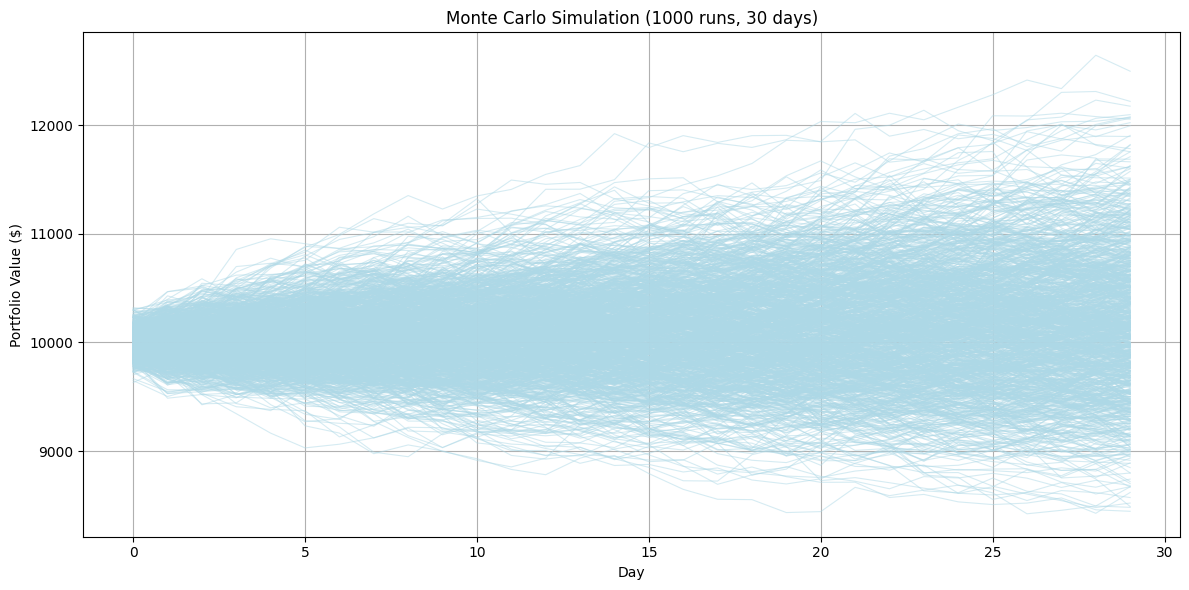

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(simulated_paths, color="lightblue", linewidth=0.8, alpha=0.5)
plt.title(f"Monte Carlo Simulation ({num_simulations} runs, {num_days} days)")
plt.xlabel("Day")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


This gives a visual range of how the portfolio might grow or decline in 30 days — useful for setting expectations and understanding worst-case trends.

We analyze the final-day outcomes of all simulations to estimate risk and possible returns.

In [ ]:
# Distribution of end-of-period values
final_values = simulated_paths[-1, :]

# Value at Risk (95% confidence)
var_95 = portfolio_value - np.percentile(final_values, 5)

# Mean ending value
mean_final = np.mean(final_values)

# Worst-case and best-case
min_final = np.min(final_values)
max_final = np.max(final_values)


This gives us statistics like expected final value, best case, worst case, and the estimated maximum loss at 95% confidence.

We print a summary of the Monte Carlo results including expected returns and losses.

In [ ]:
print(f"📉 Mean expected portfolio value after {num_days} days: ${mean_final:,.2f}")
print(f"⚠️  Value at Risk (95% confidence): You might lose up to ${var_95:,.2f}")
print(f"🔻 Worst-case (simulated): ${min_final:,.2f}")
print(f"🔺 Best-case (simulated): ${max_final:,.2f}")


📉 Mean expected portfolio value after 30 days: $10,191.05
⚠️  Value at Risk (95% confidence): You might lose up to $863.29
🔻 Worst-case (simulated): $8,445.59
🔺 Best-case (simulated): $12,497.82


These summary metrics help investors understand the distribution of outcomes, not just the average — enabling better decision-making.

## K-Means Clustering – Stock Behavior Grouping

We use K-Means to cluster stocks based on their historical mean return and volatility, helping us spot behavioral groups.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Your portfolio tickers from returns DataFrame
portfolio_stocks = returns.columns.tolist()

# Calculate features: mean return and volatility (std)
features = pd.DataFrame({
    "Mean_Return": returns.mean(),
    "Volatility": returns.std()
})


We now have a DataFrame of each stock's average return and volatility — a good feature set for unsupervised clustering.


We run K-Means clustering to group stocks into behavioral clusters and store their labels.

In [ ]:
n_assets = len(portfolio_stocks)
n_clusters = min(3, n_assets)  # At most 3 clusters for readability

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
features["Cluster"] = kmeans.fit_predict(features[["Mean_Return", "Volatility"]])


Each stock is now assigned to a cluster — for example, high-return/high-risk or low-return/low-risk. This helps us check if our portfolio is overexposed to one type of stock.

###Cluster Interpretation and Diversification

We plot the clustered stocks on a return vs. volatility scatterplot and annotate each with its ticker.

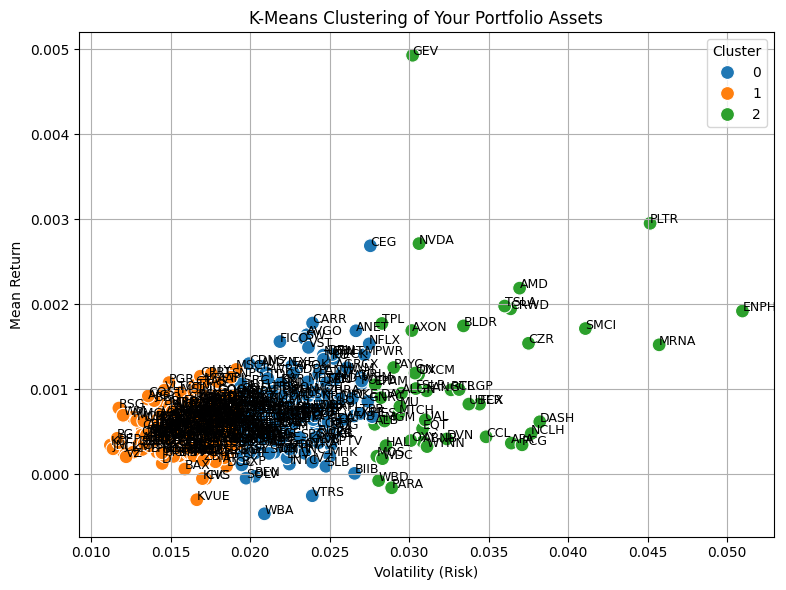

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=features,
    x="Volatility", y="Mean_Return",
    hue="Cluster", palette="tab10", s=100
)
for ticker, row in features.iterrows():
    plt.text(row["Volatility"], row["Mean_Return"], ticker, fontsize=9, ha="left")

plt.title("K-Means Clustering of Your Portfolio Assets")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Mean Return")
plt.grid(True)
plt.tight_layout()
plt.show()


This visualizes which stocks belong to which cluster and lets us quickly spot outliers or concentrations.

**Interpretation and Diversification Warning**

We interpret the cluster properties and check if the portfolio is overexposed to one type of risk-return profile.

In [ ]:
print("🧠 Interpretation:")

cluster_counts = features["Cluster"].value_counts()
dominant_cluster = cluster_counts.idxmax()
dominant_pct = cluster_counts.max() / n_assets

cluster_means = features.groupby("Cluster").mean()

for i in range(n_clusters):
    mean_ret = cluster_means.loc[i, "Mean_Return"]
    vol = cluster_means.loc[i, "Volatility"]
    print(f"\n📊 Cluster {i}:")
    print(f"  - Avg Return: {mean_ret:.4f}")
    print(f"  - Avg Volatility: {vol:.4f}")
    if mean_ret > 0 and vol > 0.03:
        print("  🔺 High-risk, high-return assets.")
    elif mean_ret > 0 and vol <= 0.03:
        print("  ✅ Stable growth assets.")
    else:
        print("  ⚠️ Low or negative return assets.")

# Diversification warning
if dominant_pct > 0.6:
    print(f"\n⚠️ Over 60% of your portfolio is in Cluster {dominant_cluster}. Consider diversifying.")
else:
    print("\n✅ Your portfolio is well distributed across different risk-return profiles.")


🧠 Interpretation:

📊 Cluster 0:
  - Avg Return: 0.0007
  - Avg Volatility: 0.0225
  ✅ Stable growth assets.

📊 Cluster 1:
  - Avg Return: 0.0006
  - Avg Volatility: 0.0162
  ✅ Stable growth assets.

📊 Cluster 2:
  - Avg Return: 0.0011
  - Avg Volatility: 0.0329
  🔺 High-risk, high-return assets.

✅ Your portfolio is well distributed across different risk-return profiles.


##Max Drawdown and Recovery Time Per Stock

We calculate each stock’s worst loss from peak (max drawdown) and how long it took to recover from that drop.

In [ ]:
# Calculate drawdowns and recovery per stock
drawdown_data = []

for ticker in returns.columns:
    ret = returns[ticker]
    cum_ret = (1 + ret).cumprod()

    running_max = cum_ret.cummax()
    drawdown = cum_ret / running_max - 1

    # Max drawdown value
    max_dd = drawdown.min()

    # Recovery time = how many days to get back to previous high
    recovery_time = 0
    peak_idx = drawdown.idxmin()
    post_peak = cum_ret.loc[peak_idx:]

    for i, val in enumerate(post_peak):
        if val >= running_max.loc[peak_idx]:
            recovery_time = i
            break
    else:
        recovery_time = np.nan  # Never recovered during observed period

    drawdown_data.append({
        "Ticker": ticker,
        "Max_Drawdown": max_dd,
        "Recovery_Days": recovery_time
    })

drawdown_df = pd.DataFrame(drawdown_data)


We now have a dataset of max drawdowns and recovery times, which helps assess historical pain and resilience for each stock.

### Cluster-Level Drawdown Summary

We combine the cluster labels with drawdown stats to compare historical risk by cluster.

In [ ]:
# Add cluster info from K-Means features
drawdown_df["Cluster"] = drawdown_df["Ticker"].map(features["Cluster"])


We calculate the average drawdown and recovery time per cluster and display the results.

In [ ]:
cluster_summary = drawdown_df.groupby("Cluster").agg({
    "Max_Drawdown": "mean",
    "Recovery_Days": "mean"
}).round(2)

print("📉 Historical Risk Behavior by Cluster:\n")
print(cluster_summary)


📉 Historical Risk Behavior by Cluster:

         Max_Drawdown  Recovery_Days
Cluster                             
0               -0.60         341.75
1               -0.44         283.31
2               -0.78         427.40


This gives deeper insights into each cluster’s downside risk and resilience — helpful for smarter portfolio rebalancing.

## Conclusion

Working on this project gave us a deeper understanding of how portfolios behave beyond just looking at profits or losses. By analyzing patterns in returns, volatility, and how different stocks are grouped based on their behavior, we were able to see risk from multiple angles — not just in numbers, but also in context.

Instead of guessing whether a portfolio is balanced or not, we were able to measure it clearly and even visualize where the risk is coming from. This helped us think more critically about diversification, stability, and how to make data-backed adjustments to a portfolio.

To make this analysis more accessible, we also created a Streamlit app that summarizes the key results and allows users to interact with the data. The app acts like a dashboard where anyone can quickly check how their portfolio is doing in terms of risk, return, and behavior — without needing to run code.

Overall, this project helped us move from just calculating metrics to actually using the insights to make better portfolio decisions — something that’s useful not just academically but also in real-world investing.

## Challenges

1. Defining a "balanced" portfolio objectively: One of the hardest challenges was determining a threshold for diversification using machine learning. While clustering helped categorize behavior, setting a reliable rule (e.g., "60% in one cluster is risky") required trial and judgment, and may not generalize for all users or portfolios.

2. Scaling for real-time user inputs: Our current system is built on static analysis. If we wanted the Streamlit app to support real-time user-uploaded portfolios, it would require more modular architecture, error handling, and compute-efficient design — especially for GARCH or Monte Carlo simulations which are resource-intensive.

3. Handling incomplete or missing data: Some stocks had gaps in their historical price data, especially during financial crises or IPO periods. This affected clustering and volatility forecasts. We had to drop certain tickers, which may impact portfolio accuracy — and solving this robustly would require imputation strategies or cross-referencing with backup sources.

4. Contextualizing ML outputs for human decision-making: Translating clustering and simulation results into practical, easy-to-understand investment advice was non-trivial. For example, we could say a stock belongs to a "high-risk" cluster, but explaining what action the user should take (e.g., replace with what?) is a much harder problem, especially without introducing bias.

5. Performance constraints for advanced models: Some models like GARCH or large-scale Monte Carlo simulations become slow in a browser-based tool like Streamlit. Optimizing or offloading this to a background job system (like Celery or AWS Lambda) would be necessary for production, but wasn't feasible in our scope.

## Generative AI Usage Disclosure

We used ChatGPT during the development of this project to assist in a few key areas:

* To brainstorm and refine complex queries, especially for statistical modeling and data alignment tasks.

* To format and clean up code for better readability and structure.

* To help clarify financial concepts and improve how we explained our results in markdown and documentation.

All final decisions, modeling logic, and interpretations were reviewed and implemented by our team. ChatGPT served primarily as a collaborative assistant to improve our efficiency and communication.



In [ ]:
# Extract Adjusted Close Prices if not already extracted
adj_close_df = prices_all["Adj Close"].dropna(axis=1)


KeyError: 'Adj Close'